# Differential accessibility for E vs V snATAC-seq
- https://stuartlab.org/signac/articles/mouse_brain_vignette

## Set up correct conda environment


In [1]:
.libPaths('/home/groups/tttt/xjluo/miniconda3/envs/single_cell/lib/R/library')
.libPaths()

[1] "/home/groups/tttt/xjluo/miniconda3/envs/single_cell/lib/R/library"
[2] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

## Load packages

In [21]:
library(tidyverse)
library(viridis)
library(Seurat)
library(Signac)
library(Azimuth)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ggpointdensity)
library(ggExtra)

library(chromVAR)
library(JASPAR2020)
library(TFBSTools)
library(patchwork)

set.seed(1234)
options(repr.matrix.max.cols=100, repr.matrix.max.rows=50)
options(warn=-1)

In [3]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/users/xjluo/miniconda3/envs/jupyter_env/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggExtra_0.10.1                     ggpointdensity_0.1.0              
 [3] BSgenome.Mmusculus.UCSC.mm10_1.4.3 BSgenome_1.66.3                   
 [5] rtracklayer_1.58.0                 Biostrings_2.66.0                 
 [7] XVector_0.38.0                     EnsDb.Mmuscu

## STEP 0: Paths

In [4]:
# outputs
data_master_dir <- '/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger'

In [5]:
# E+V merged, annotated object
E_V.atac.obj.path <- paste0(data_master_dir, '/xjluo_analysis', '/step2_merge', '/E_V', '/E_V_merged.annotated.clustered.rds')

E_V.atac.obj.path

[1] "/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger/xjluo_analysis/step2_merge/E_V/E_V_merged.annotated.clustered.rds"

In [6]:
# scRNA-seq
rna_path <- paste0(data_master_dir, '/xjluo_analysis/step1_qc/', 'RNA', '/', 'RNA.both.conditions.annotated.Seurat.v4.rds')

rna_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger/xjluo_analysis/step1_qc/RNA/RNA.both.conditions.annotated.Seurat.v4.rds"

In [7]:
# save output (labeled) object in this folder
merge_savedir <- paste0(data_master_dir, '/xjluo_analysis/step2_merge')

merge_savedir

[1] "/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger/xjluo_analysis/step2_merge"

## STEP 1: Load objects

In [8]:
E_V.merged.atac.obj <- readRDS(E_V.atac.obj.path)

In [9]:
rna.obj <- readRDS(rna_path)

In [10]:
E_V.merged.atac.obj

An object of class Seurat 
284433 features across 3447 samples within 2 assays 
Active assay: ACTIVITY (2071 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: lsi, umap

In [11]:
colnames(E_V.merged.atac.obj@meta.data)

[1] "orig.ident"                  "nCount_ATAC"                
 [3] "nFeature_ATAC"               "nucleosome_signal"          
 [5] "nucleosome_percentile"       "TSS.enrichment"             
 [7] "TSS.percentile"              "ATAC_snn_res.1.2"           
 [9] "seurat_clusters"             "dataset"                    
[11] "nCount_ACTIVITY"             "nFeature_ACTIVITY"          
[13] "predicted.id"                "prediction.score.IN.1"      
[15] "prediction.score.L4.PN.1"    "prediction.score.IN.2"      
[17] "prediction.score.L2_3.PN.1"  "prediction.score.L2_3.PN.2" 
[19] "prediction.score.L4.PN.2"    "prediction.score.L5.PN"     
[21] "prediction.score.L6CT.L6b.1" "prediction.score.L6.IT.2"   
[23] "prediction.score.L6.L6b.2"   "prediction.score.L6.IT.1"   
[25] "prediction.score.IN.3"       "prediction.score.max"       
[27] "ATAC_snn_res.0.8"

In [12]:
rna.obj

An object of class Seurat 
52425 features across 5489 samples within 2 assays 
Active assay: SCT (20140 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, rna_only_UMAP

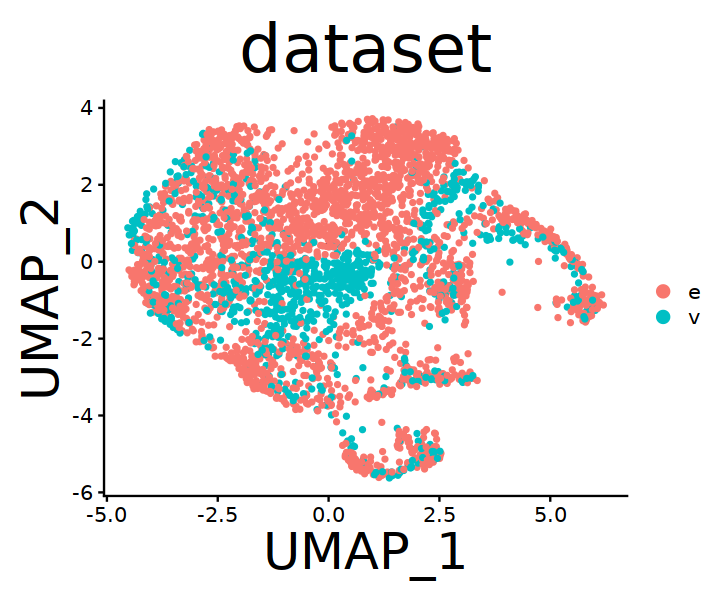

In [13]:
options(repr.plot.width=6, repr.plot.height=5)

DimPlot(E_V.merged.atac.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'dataset', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

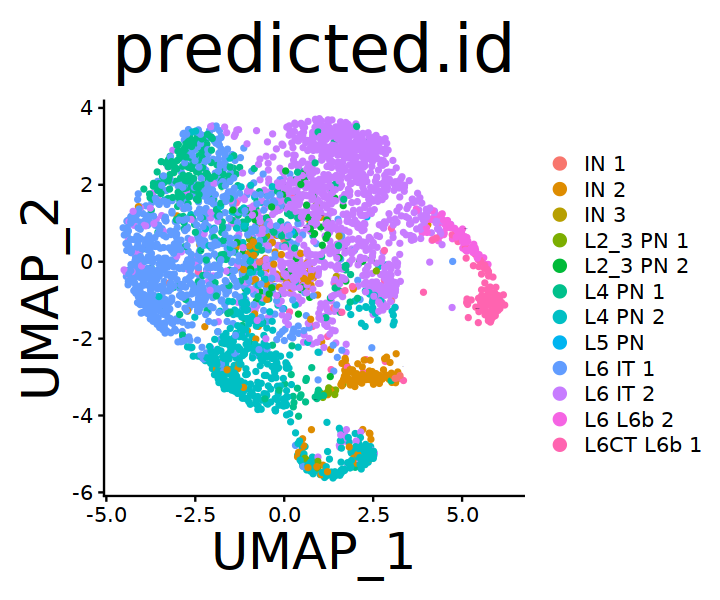

In [14]:
options(repr.plot.width=6, repr.plot.height=5)

DimPlot(E_V.merged.atac.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'predicted.id', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

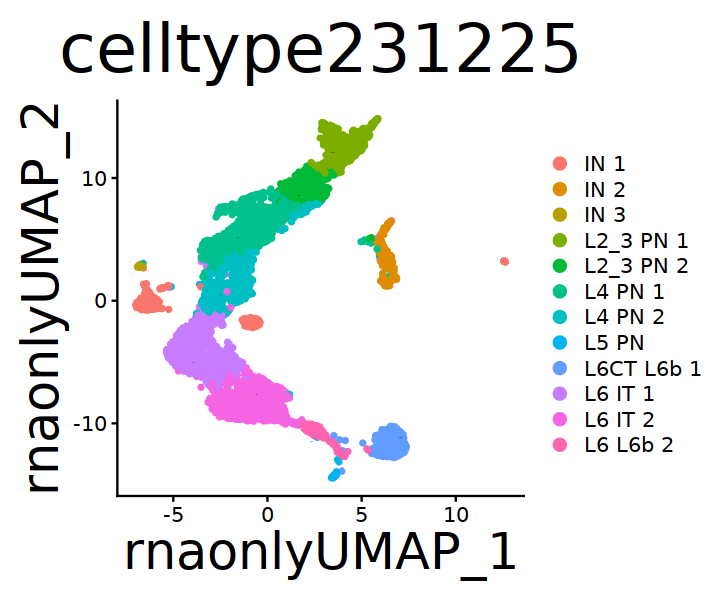

In [15]:
options(repr.plot.width=6, repr.plot.height=5)

DimPlot(rna.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'celltype231225', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

## STEP 2: Run ChromVAR

In [17]:
# Get a list of motif position frequency matrices from the JASPAR database
pfm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE)
)

In [20]:
# add motif information
DefaultAssay(E_V.merged.atac.obj) <- 'ATAC'

E_V.merged.atac.obj <- AddMotifs(
  object = E_V.merged.atac.obj,
  genome = BSgenome.Mmusculus.UCSC.mm10,
  pfm = pfm
)

Building motif matrix

Finding motif positions

Creating Motif object



In [23]:
E_V.merged.atac.obj <- RunChromVAR(
  object = E_V.merged.atac.obj,
  genome = BSgenome.Mmusculus.UCSC.mm10
)

Computing GC bias per region

Selecting background regions

Computing deviations from background

Constructing chromVAR assay



In [24]:
E_V.merged.atac.obj

An object of class Seurat 
285179 features across 3447 samples within 3 assays 
Active assay: ATAC (282362 features, 269799 variable features)
 2 other assays present: ACTIVITY, chromvar
 2 dimensional reductions calculated: lsi, umap

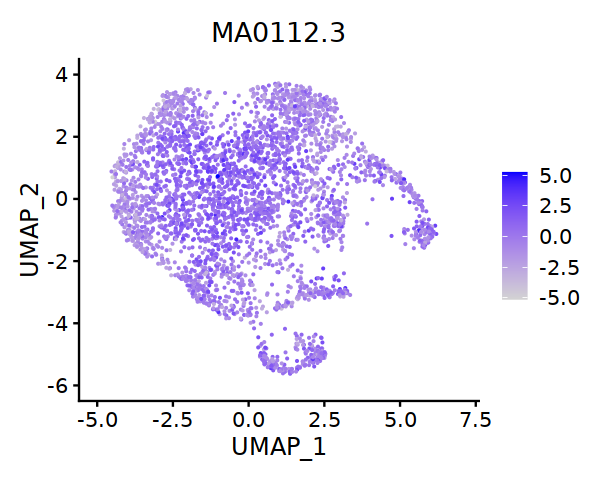

In [49]:
options(repr.plot.width=5, repr.plot.height=4)

DefaultAssay(E_V.merged.atac.obj) <- 'chromvar'

FeaturePlot(
  object = E_V.merged.atac.obj,
  features = "MA0112.3",
#   min.cutoff = 'q5',
#   max.cutoff = 'q95',
  pt.size = 0.1
)


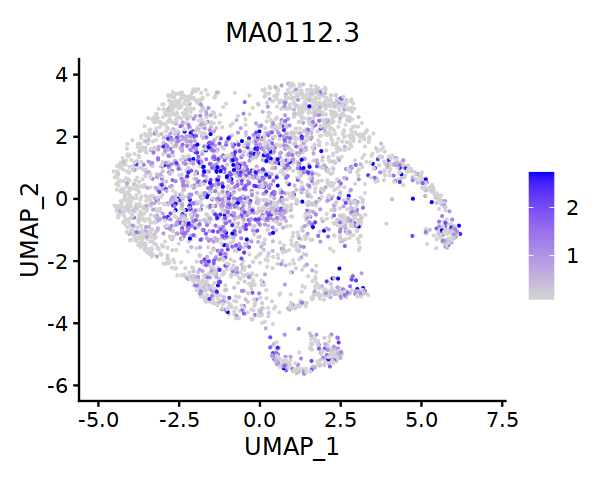

In [51]:
options(repr.plot.width=5, repr.plot.height=4)

DefaultAssay(E_V.merged.atac.obj) <- 'chromvar'

FeaturePlot(
  object = E_V.merged.atac.obj,
  features = "MA0112.3",
  min.cutoff = 'q5',
  max.cutoff = 'q95',
  pt.size = 0.1
)


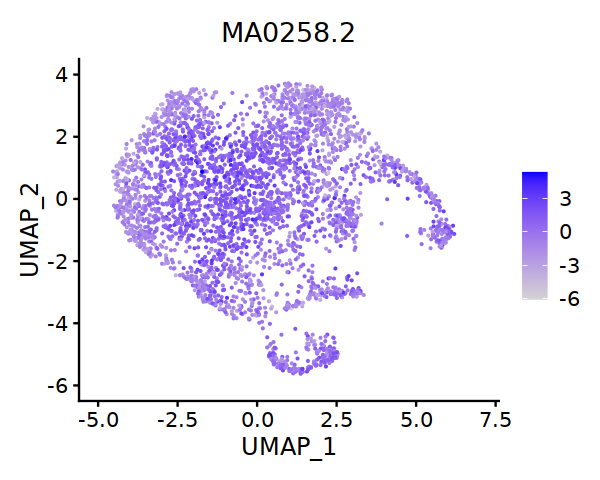

In [50]:
options(repr.plot.width=5, repr.plot.height=4)

DefaultAssay(E_V.merged.atac.obj) <- 'chromvar'

FeaturePlot(
  object = E_V.merged.atac.obj,
  features = "MA0258.2",
#   min.cutoff = 'q5',
#   max.cutoff = 'q95',
  pt.size = 0.1
)


In [31]:
Idents(E_V.merged.atac.obj) <- 'dataset'
head(Idents(E_V.merged.atac.obj))

E_AAACGAAAGACTAATG-1 E_AAACGAAAGCAGAAAG-1 E_AAACGAAAGTACGACG-1 
                   e                    e                    e 
E_AAACGAACAACGACAG-1 E_AAACGAATCGATAGCT-1 E_AAACTCGAGTTCGACT-1 
                   e                    e                    e 
Levels: e v

In [31]:
Idents(E_V.merged.atac.obj) <- 'dataset'
head(Idents(E_V.merged.atac.obj))

E_AAACGAAAGACTAATG-1 E_AAACGAAAGCAGAAAG-1 E_AAACGAAAGTACGACG-1 
                   e                    e                    e 
E_AAACGAACAACGACAG-1 E_AAACGAATCGATAGCT-1 E_AAACTCGAGTTCGACT-1 
                   e                    e                    e 
Levels: e v

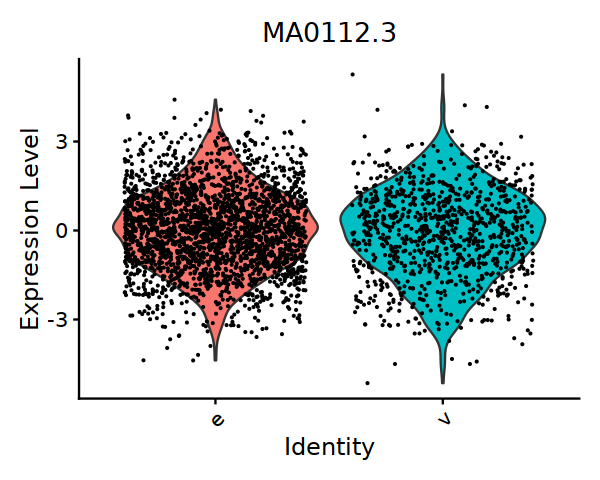

In [45]:
VlnPlot(
  object = E_V.merged.atac.obj,
  features = c('MA0112.3'),
  pt.size = 0.1
) + theme(legend.position="none")

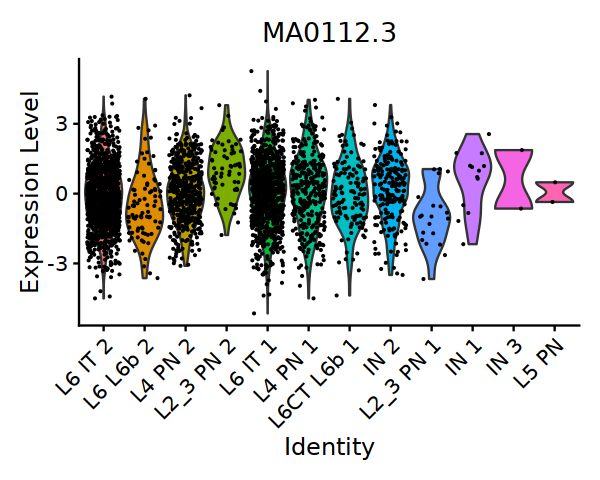

In [46]:
Idents(E_V.merged.atac.obj) <- 'predicted.id'

VlnPlot(
  object = E_V.merged.atac.obj,
  features = c('MA0112.3'),
  pt.size = 0.1
) + theme(legend.position="none")

In [32]:
differential.activity <- FindMarkers(
  object = E_V.merged.atac.obj,
  ident.1 = 'e',
  ident.2 = 'v',
  only.pos = TRUE,
  mean.fxn = rowMeans,
  fc.name = "avg_diff"
)

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



In [33]:
differential.activity

,p_val,avg_diff,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MA0060.3,9.916070e-17,0.2975703,0.539,0.407,7.397388e-14
MA1644.1,1.972934e-16,0.2846642,0.543,0.405,1.471808e-13


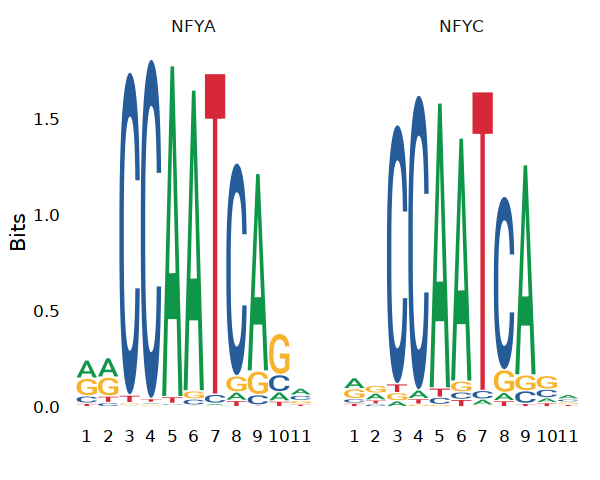

In [34]:
MotifPlot(
  object = E_V.merged.atac.obj,
  motifs = head(rownames(differential.activity)),
  assay = 'ATAC'
)

# END